In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py

# Data

In [2]:
data = pd.read_csv("abalone.csv")

The abalone.data file has been converted to csv file and the headers have been added.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole_Weight      4177 non-null float64
Shucked_Weight    4177 non-null float64
Viscera_Weight    4177 non-null float64
SHell_Weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


describe() function gives the overall statistical analysis of data as shown below.

In [4]:
data.describe()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


We can see the the minimum value of height is 0, which is practically not possible, so that perticular data can be wrong. Also the minimum value of Whole_Weight is very less.We will sort the data according to both the variabls.

In [5]:
data.sort_values(by=["Height"]).head(10)

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Rings
3996,I,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6
1257,I,0.430,0.340,0.000,0.4280,0.2065,0.0860,0.1150,8
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
2169,I,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4
1174,F,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,9
3902,I,0.160,0.120,0.020,0.0180,0.0075,0.0045,0.0050,4
694,I,0.165,0.110,0.020,0.0190,0.0065,0.0025,0.0050,4
1987,I,0.160,0.110,0.025,0.0195,0.0075,0.0050,0.0060,4
2381,M,0.155,0.115,0.025,0.0240,0.0090,0.0050,0.0075,5
3190,I,0.200,0.145,0.025,0.0345,0.0110,0.0075,0.0100,5


In [6]:
data = data.loc[data["Height"] != 0.0]

loc() selects the row which have non-zero height. loc() takes boolean input.

In [7]:
data.sort_values(by=["Whole_Weight"]).head(10)

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Rings
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
2114,I,0.130,0.095,0.035,0.0105,0.0050,0.0065,0.0035,4
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
1429,I,0.140,0.105,0.035,0.0140,0.0055,0.0025,0.0040,3
3899,I,0.140,0.105,0.035,0.0145,0.0050,0.0035,0.0050,4
2169,I,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4
719,I,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
526,M,0.155,0.110,0.040,0.0155,0.0065,0.0030,0.0050,3
696,I,0.155,0.105,0.050,0.0175,0.0050,0.0035,0.0050,4


It seems that low weight entries are perfect,because they  have less rings,small size and low weight.

# Findidng the Correlation

In [8]:
data.corr()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,SHell_Weight,Rings
Length,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464
Diameter,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418
Height,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625
Whole_Weight,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151
Shucked_Weight,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597
Viscera_Weight,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562
SHell_Weight,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928
Rings,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000


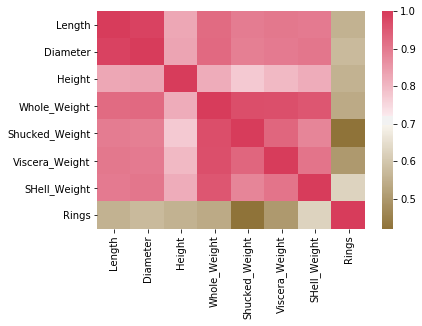

In [9]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, cmap=sns.diverging_palette(420, 5, as_cmap=True))

   Here we can see that except ring count, every other variable is highly correlated with other.
   
   Aalso whole_weight is correlated with other weights, this is because whole weight is nothing but sum of all the different types of weights, so we can remove those other weight features and can go with only whole_weight.
   
   Length and diameter are just about perfectly correlated. The circumfrence of an ellipse is proportional to its length with the constant of proportionality determined by its eccentricity, so no surprise there. 
   
   Height is strongly correlated with the remaining features, but not as strongly as, say, length with diameter. We'll replace these three features with their geometric mean. While keeping length, diameter, and height can only help with prediction.
   

In [10]:
data_trunc = pd.DataFrame({ "Whole_Weight": data["Whole_Weight"],
                           "x": np.cbrt(data["Length"]*data["Diameter"]*data["Height"]),
                           "Rings": data["Rings"],
                          "Sex": data["Sex"]})

So we have replaced length, diameter, and height features with x and removed all the weights except the whole weight.

In [11]:
data_trunc.corr()

,Whole_Weight,x,Rings
Whole_Weight,1.000000,0.931968,0.540151
x,0.931968,1.000000,0.593123
Rings,0.540151,0.593123,1.000000


Now we'll try to find the mathematical relation between these features. Also we can see that x and whole_weight are very highly correlated. Let's plot them.

Text(0, 0.5, 'x')

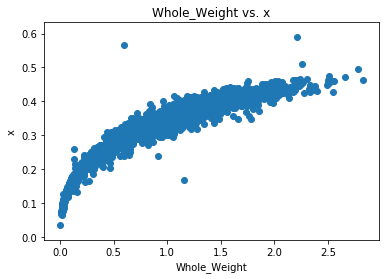

In [12]:
plt.scatter(data_trunc["Whole_Weight"], data_trunc["x"])
plt.title("Whole_Weight vs. x")
plt.xlabel("Whole_Weight")
plt.ylabel("x")

From above graph, we can see that Whole_Weight and x has exponential relation. $x = w^{\alpha} $.
Let take $\alpha = 0.5 $. That is square-root.

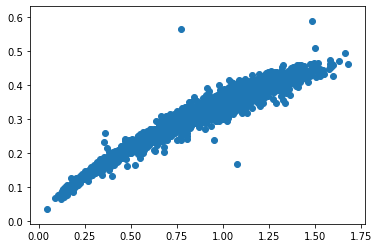

In [13]:
plt.scatter(np.sqrt(data_trunc["Whole_Weight"]), data_trunc["x"])

This still doesn't seem linear.
Let's try cube root.

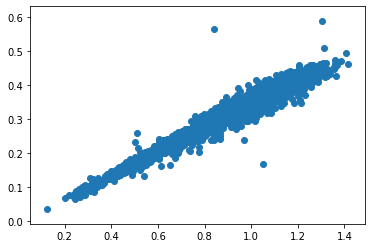

In [14]:
plt.scatter(np.cbrt(data_trunc["Whole_Weight"]), data_trunc["x"])

This graph is linear. So we'll repalce the whole weight feature with it's cube root.

In [15]:
data_trunc["w"] = np.cbrt(data_trunc["Whole_Weight"])

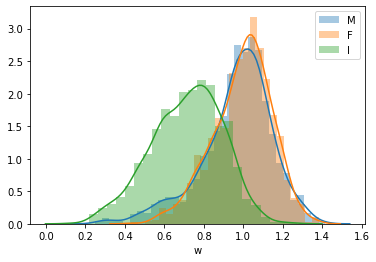

In [16]:
dm = data_trunc.loc[data_trunc["Sex"] == 'M']
df = data_trunc.loc[data_trunc["Sex"] == 'F']
di = data_trunc.loc[data_trunc["Sex"] == 'I']

ax = sns.distplot(dm["w"],label = 'M')
ax = sns.distplot(df["w"],label = 'F')
ax = sns.distplot(di["w"],label = 'I')
ax.legend()

Now the cube root of weight feature is ver much similar for male and female and different for infant. So we can merge M and F and make the sex feature binary with infant being 1 and others being(M or F) 0.

In [17]:
data_trunc["Is_Infant"] = data_trunc["Sex"].map(lambda x: 0 if x=="M" or x=="F"  else 1  )

In [18]:
data_trunc.head()

,Whole_Weight,x,Rings,Sex,w,Is_Infant
0,0.5140,0.250809,15,M,0.801040,0
1,0.2255,0.202855,7,M,0.608670,0
2,0.6770,0.310899,9,F,0.878071,0
3,0.5160,0.271781,10,M,0.802078,0
4,0.2050,0.188820,7,I,0.589637,1


Now we will try to find the relation between Ring count and cube-root of weight w.

Text(0.5, 0, 'w')

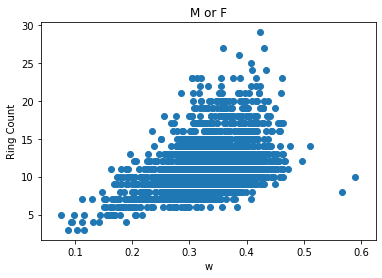

In [19]:
plt.scatter(data_trunc.loc[data_trunc["Is_Infant"] == 0 ]["x"],
            data_trunc.loc[data_trunc["Is_Infant"] == 0 ]["Rings"])
plt.title("M or F")
plt.ylabel("Ring Count")
plt.xlabel("w")

Text(0.5, 0, 'w')

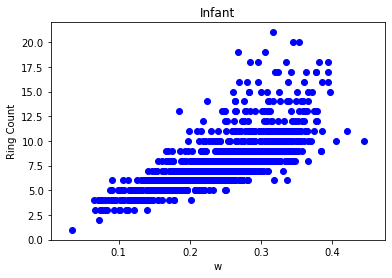

In [20]:
plt.scatter(data_trunc.loc[data_trunc["Is_Infant"] == 1 ]["x"],
            data_trunc.loc[data_trunc["Is_Infant"] == 1 ]["Rings"], color="blue")
plt.title("Infant")
plt.ylabel("Ring Count")
plt.xlabel("w")

Here we can see that both the graphs are showing fanning effect. Let's use log function on ring count.

In [21]:
data_trunc["Log_Rings"] = np.log(data_trunc["Rings"])

Text(0.5, 0, 'w')

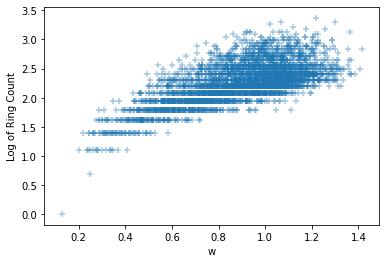

In [22]:
plt.scatter(data_trunc["w"], data_trunc["Log_Rings"], alpha=0.4, marker='+')
plt.ylabel("Log of Ring Count")
plt.xlabel("w")

# Model the Data

In [23]:
non_inf_data = data_trunc.loc[data_trunc["Is_Infant"] == 0]
non_inf_data = non_inf_data.sort_values(by=["w"], ascending=False)

inf_data = data_trunc.loc[data_trunc["Is_Infant"] == 1]
inf_data = inf_data.sort_values(by=["w"], ascending=False)




# On Infant Data

I have used the multi variate linear regression method to model the data. And I have done third order fit.

In [24]:
#xx = data_trunc["w"]**0;
x1 = inf_data["w"]**1
x2 = inf_data["w"]**2
x3 = inf_data["w"]**3
#x4 = inf_data["w"]**4
#x5 = inf_data["w"]**5

#x_i = [x1,x2,x3,x4]
x_i = [x1,x2,x3]
x_i = np.transpose(x_i)
y_i = inf_data["Log_Rings"]


In [25]:
from sklearn.model_selection import train_test_split

X_i_train, X_i_test, y_i_train, y_i_test = train_test_split(x_i,y_i, test_size=0.2, random_state=42)

Multi-Variate Linear Regression using Gradient Descent Optimization 

In [26]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

Function to do gradient descent:

In [27]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    lmd = 0.01
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j]*(1-alpha*lmd/X.shape[0]) - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = ((1/X.shape[0]) * 0.5 * sum(np.square(h - y))) + lmd*sum(np.square(theta[1:]))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [28]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [29]:
theta_i, cost_i = linear_regression(X_i_train, y_i_train,0.0001, 20000)

Text(0, 0.5, 'Cost')

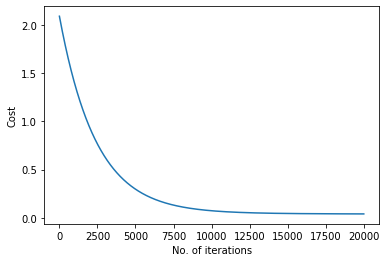

In [30]:
import matplotlib.pyplot as plt
cost_i = list(cost_i)
n_iterations = [x for x in range(1,20001)]
plt.plot(n_iterations, cost_i)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

The cost is becoming constant as number of itteration increases and cost is decreasing as ni. of iterations increases.

# Applying on test set

In [31]:
n = X_i_test.shape[1]
one_column = np.ones((X_i_test.shape[0],1))
X_i_test = np.concatenate((one_column, X_i_test), axis = 1)
hi_test = np.ones((X_i_test.shape[0],1))
theta_i = theta_i.reshape(1,n+1)
for i in range(0,X_i_test.shape[0]):
    hi_test[i] = float(np.matmul(theta_i,X_i_test[i]))
hi_test = hi_test.reshape(X_i_test.shape[0])

Text(0.5, 0, 'w')

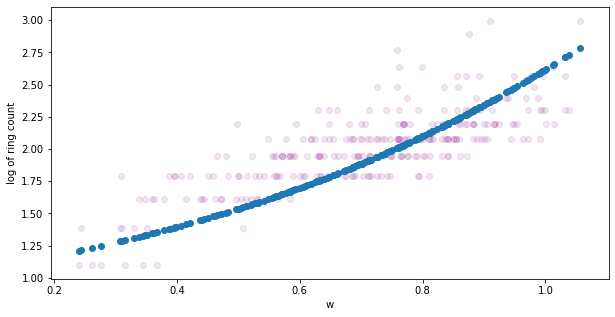

In [32]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.scatter(X_i_test[:, 1], y_i_test, color="purple", alpha=0.1, label="Infant Data")
ax.scatter(X_i_test[:, 1], hi_test)
plt.ylabel('log of ring count')
plt.xlabel('w')

Blue dots are showing predicted value and purple are showing actual value. So from above graph, we can say that predicted value is very much closer to the actual value.

# On non-infant Data

In [33]:
xx1 = non_inf_data["w"]**1
xx2 = non_inf_data["w"]**2
xx3 = non_inf_data["w"]**3
#xx4 = non_inf_data["w"]**4

#x_ni = [xx1,xx2,xx3,xx4]
x_ni = [xx1,xx2,xx3]
x_ni = np.transpose(x_ni)
y_ni = non_inf_data["Log_Rings"]


In [34]:
from sklearn.model_selection import train_test_split
X_ni_train, X_ni_test, y_ni_train, y_ni_test = train_test_split(x_ni,y_ni, test_size=0.2, random_state=42)

In [35]:
theta_ni, cost_ni = linear_regression(X_ni_train, y_ni_train,0.0001, 20000)

Text(0, 0.5, 'Cost')

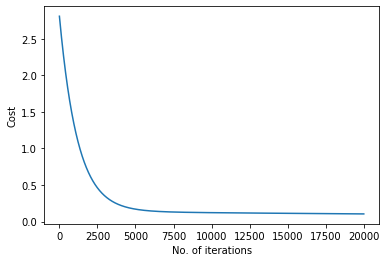

In [37]:
import matplotlib.pyplot as plt
cost_ni = list(cost_ni)
n_iterations = [x for x in range(1,20001)]
plt.plot(n_iterations, cost_ni)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

In [38]:
n = X_ni_test.shape[1]
one_column = np.ones((X_ni_test.shape[0],1))
X_ni_test = np.concatenate((one_column, X_ni_test), axis = 1)
hni_test = np.ones((X_ni_test.shape[0],1))
theta_ni = theta_ni.reshape(1,n+1)
for i in range(0,X_i_test.shape[0]):
    hni_test[i] = float(np.matmul(theta_ni,X_ni_test[i]))
hni_test = hni_test.reshape(X_ni_test.shape[0])

Text(0.5, 0, 'w')

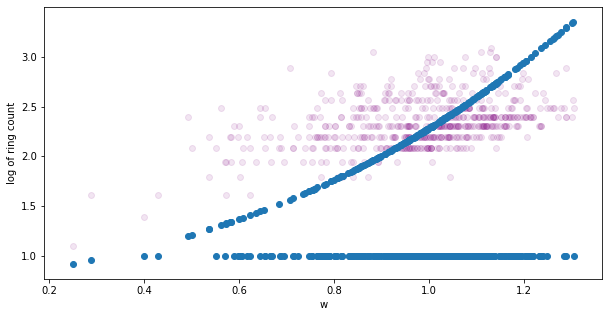

In [44]:
fig = plt.figure(figsize=(10,5))
a = fig.add_subplot(111)

a.scatter(X_ni_test[:, 1], y_ni_test, color="purple", alpha=0.1, label="non-Infant Data")
a.scatter(X_ni_test[:, 1], hni_test)
plt.ylabel('log of ring count')
plt.xlabel('w')